In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tensorflow==2.0.0

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

     |████████████████████████████████| 86.3MB 110kB/s 
     |████████████████████████████████| 450kB 65.3MB/s 
     |████████████████████████████████| 3.8MB 55.6MB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

2.0.0


Downloading the imdb databases for movie reviews

In [2]:
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimensions):
  results = np.zeros((len(sequences),dimensions))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0
  return results

train_data = multi_hot_sequences(train_data, dimensions=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimensions=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


Explore the data

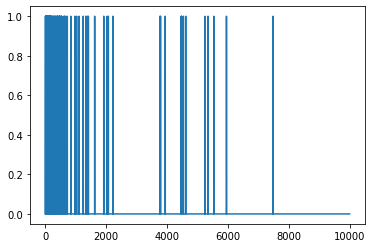

In [3]:
plt.plot(train_data[0])

Demonstrate Overfitting

Create a baseline model

In [4]:
baseline_model = keras.Sequential([
                                   # input shape is only required here so that summary works
                                   keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
                                   keras.layers.Dense(16, activation='relu'),
                                   keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimiazer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy','binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data, 
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.4571 - accuracy: 0.8116 - binary_crossentropy: 0.4571 - val_loss: 0.3467 - val_accuracy: 0.8674 - val_binary_crossentropy: 0.3467
Epoch 2/20
25000/25000 - 3s - loss: 0.2594 - accuracy: 0.9086 - binary_crossentropy: 0.2594 - val_loss: 0.2897 - val_accuracy: 0.8865 - val_binary_crossentropy: 0.2897
Epoch 3/20
25000/25000 - 3s - loss: 0.1979 - accuracy: 0.9294 - binary_crossentropy: 0.1979 - val_loss: 0.2924 - val_accuracy: 0.8829 - val_binary_crossentropy: 0.2924
Epoch 4/20
25000/25000 - 3s - loss: 0.1653 - accuracy: 0.9406 - binary_crossentropy: 0.1653 - val_loss: 0.3146 - val_accuracy: 0.8770 - val_binary_crossentropy: 0.3146
Epoch 5/20
25000/25000 - 3s - loss: 0.1402 - accuracy: 0.9513 - binary_crossentropy: 0.1402 - val_loss: 0.3122 - val_accuracy: 0.8803 - val_binary_crossentropy: 0.3122
Epoch 6/20
25000/25000 - 3s - loss: 0.1208 - accuracy: 0.9589 - binary_crossentropy: 0.1208 - val_loss: 0.3710

Create a smaller Model

In [6]:
smaller_model = keras.Sequential([
                                  keras.layers.Dense(4, activation='relu',input_shape=(NUM_WORDS,)),
                                  keras.layers.Dense(4, activation='relu'),
                                  keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


And train the model using same data

In [0]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5945 - accuracy: 0.7152 - binary_crossentropy: 0.5945 - val_loss: 0.5348 - val_accuracy: 0.7908 - val_binary_crossentropy: 0.5348
Epoch 2/20
25000/25000 - 3s - loss: 0.4835 - accuracy: 0.8540 - binary_crossentropy: 0.4835 - val_loss: 0.4852 - val_accuracy: 0.8481 - val_binary_crossentropy: 0.4852
Epoch 3/20
25000/25000 - 3s - loss: 0.4201 - accuracy: 0.8995 - binary_crossentropy: 0.4201 - val_loss: 0.4320 - val_accuracy: 0.8686 - val_binary_crossentropy: 0.4320
Epoch 4/20
25000/25000 - 3s - loss: 0.3319 - accuracy: 0.9265 - binary_crossentropy: 0.3319 - val_loss: 0.3538 - val_accuracy: 0.8803 - val_binary_crossentropy: 0.3538
Epoch 5/20
25000/25000 - 3s - loss: 0.2442 - accuracy: 0.9407 - binary_crossentropy: 0.2442 - val_loss: 0.3095 - val_accuracy: 0.8850 - val_binary_crossentropy: 0.3095
Epoch 6/20
25000/25000 - 3s - loss: 0.1941 - accuracy: 0.9492 - binary_crossentropy: 0.1941 - val_loss: 0.2975

Build Bigger Model

In [0]:
bigger_model = keras.Sequential([
                                  keras.layers.Dense(512, activation='relu',input_shape=(NUM_WORDS,)),
                                  keras.layers.Dense(512, activation='relu'),
                                  keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Loss Function and Optimizer

In [0]:
bigger_history = bigger_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Plot various models and history

In [0]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')
  
  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()
  plt.xlim([0,max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

Stategies to prevent overfitting:


1.   L1 Regularization
2.   L1 Regularization



In [0]:
l2_model = keras.Sequential([
                              keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu',input_shape=(NUM_WORDS,)),
                              keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),activation='relu'),
                              keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy','binary_crossentropy'])

l2_history = bigger_model.fit(train_data,
                              train_labels,
                              epochs=20,
                              batch_size=512,
                              validation_data=(test_data, test_labels),
                              verbose=2)

Plot History of the regularized model

In [0]:
plot_history([('baseline', baseline_history),
              ('l2',l2_history)])

Try Dropouts

In [0]:
dpt_model = keras.Sequential([
                              keras.layers.Dense(16, activation='relu',input_shape=(NUM_WORDS,)),
                              keras.layers.Dropout(0.5),
                              keras.layers.Dense(16, activation='relu'),
                              keras.layers.Dropout(0.5),
                              keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy','binary_crossentropy'])

dpt_model_history = bigger_model.fit(train_data,
                              train_labels,
                              epochs=20,
                              batch_size=512,
                              validation_data=(test_data, test_labels),
                              verbose=2)

In [0]:
plot_history([('baseline', baseline_history),
              ('dropout',dpt_model_history)])

Conclusion